<a href="https://colab.research.google.com/github/duakhan3804-tech/machine_learning_unsupervised/blob/main/houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Importing Necessary Libraries

In [ ]:
#loading need libraries

# https://forms.gle/Kpm73pYAkcw8gr3u6
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Loading Dataset

In [ ]:
# https://www.kaggle.com/datasets/srikanthladda/house-price-prediction
train = pd.read_csv('/content/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Data Exploration

In [ ]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
train['MiscFeature'].value_counts()

,count
MiscFeature,
Shed,49
Gar2,2
Othr,2
TenC,1


In [ ]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
#shape of train data
train.shape

(1460, 81)

In [ ]:
#you can also check the data set information using the info() command.
train.info()
drop_col = ['Alley','PoolQC','Fence','MiscFeature']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Numerical Data | Type

In [ ]:
int_col = train.select_dtypes(include=['int64']).columns.tolist()
train[int_col]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
float_col = train.select_dtypes(include=['float64']).columns.tolist()
train[float_col]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [ ]:
train[float_col].head(50)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,NaN,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


In [ ]:
cat_col = train.select_dtypes(include=['object']).columns.tolist()
train[cat_col]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Distribution of Target Variable
A "dist plot" typically refers to a distribution plot, which is a graphical representation of the distribution of a dataset. It helps you understand the underlying probability distribution of the data, providing insights into the central tendency, spread, and shape of the data.

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3422018399.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3422018399.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

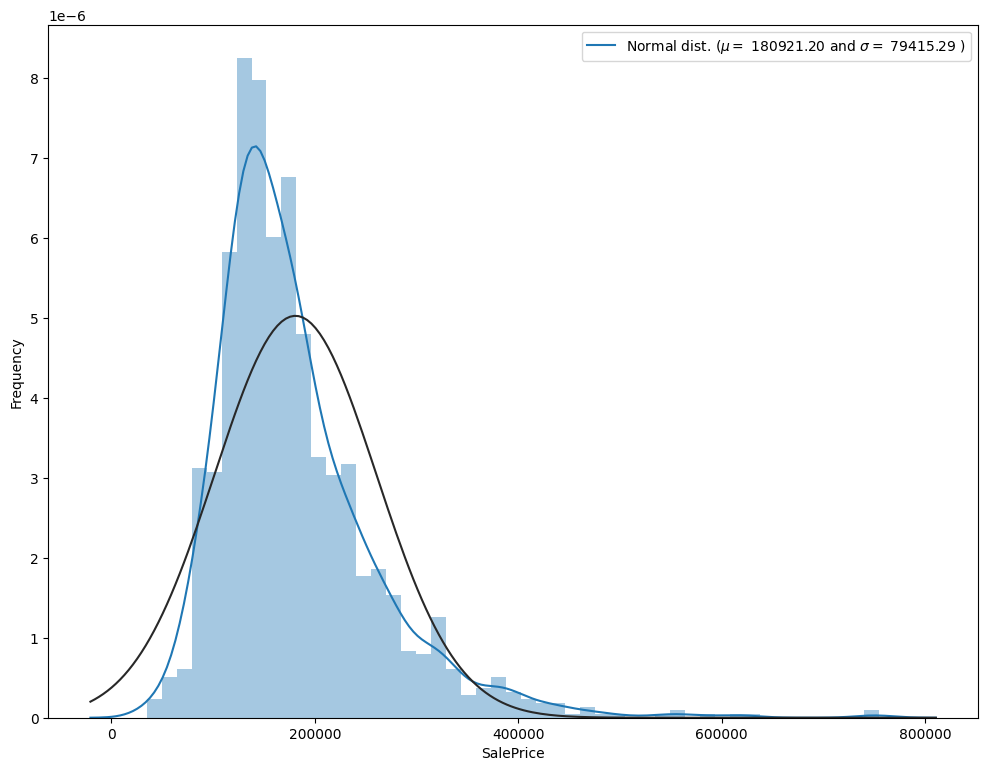

In [ ]:
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [ ]:
train['SalePrice']

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
train['SalePrice']


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


##### This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3906319441.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3906319441.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

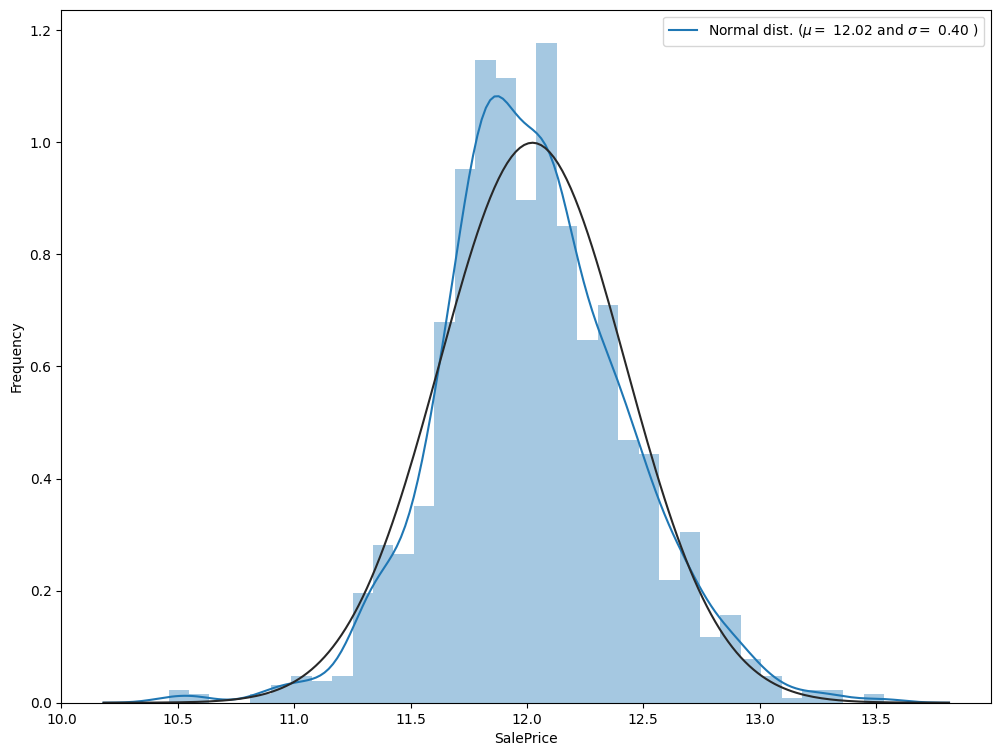

In [ ]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [ ]:
train['SalePrice']

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


In [ ]:
train['SalePrice'][0] = np.expm1(train['SalePrice'][0])


/tmp/ipython-input-2967411214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'][0] = np.expm1(train['SalePrice'][0])


In [ ]:
train['SalePrice'][0]

np.float64(208499.99999999983)

##### Detecting Missing Values

In [ ]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull


,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945




#### Inconsistency

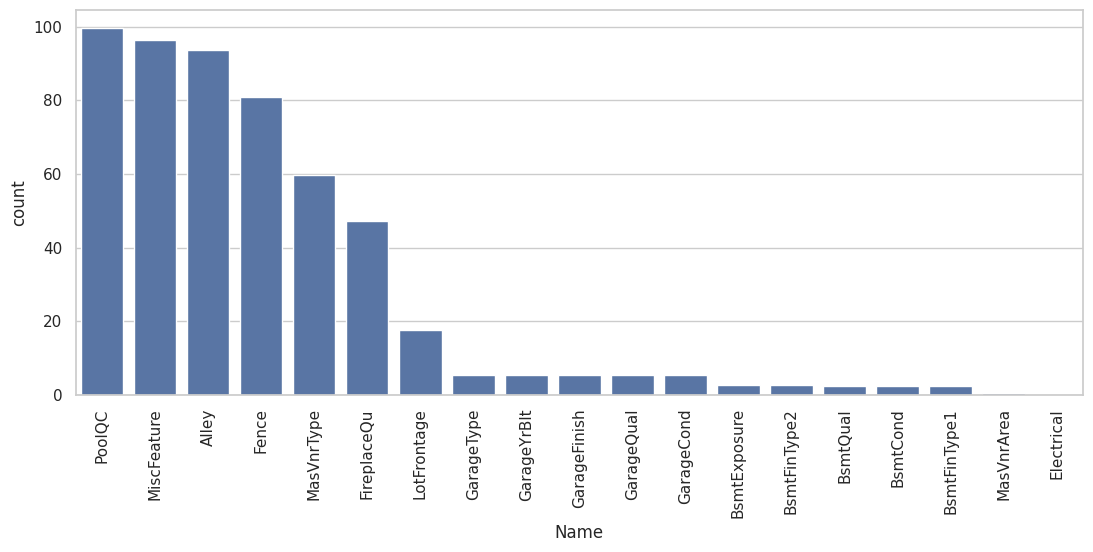

In [ ]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']

# print(Isnull)
Isnull['Name'] = Isnull.index

#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])
train_corr.shape

(1460, 38)



#### Finding Top Features of the Dataset

In [ ]:
#Coralation plot
corr = train.corr()
plt.subplots(figsize=(100,100))
sns.heatmap(corr, annot=True)

ValueError: could not convert string to float: 'RL'

In [ ]:
thres = (corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [ ]:
print("Find most important features relative to target")
corr = train_corr.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

#### Handling Missing Values

In [ ]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

train['MasVnrType'] = train['MasVnrType'].fillna('None')

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

train = train.drop('PoolQC', axis = 1)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Split your features
categorical_none = ['MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
                    'MasVnrType']
categorical_mode = ['Electrical']
numerical_mean = ['LotFrontage']
numerical_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

# Imputers
none_imputer = SimpleImputer(strategy='constant', fill_value='None')
mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
zero_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Apply imputers
train[categorical_none] = none_imputer.fit_transform(train[categorical_none])
train[categorical_mode] = mode_imputer.fit_transform(train[categorical_mode])
train[numerical_mean] = mean_imputer.fit_transform(train[numerical_mean])
train[numerical_zero] = zero_imputer.fit_transform(train[numerical_zero])

# Drop PoolQC as before
train = train.drop('PoolQC', axis=1)


ValueError: fill_value='None' (of type <class 'str'>) cannot be cast to the input data that is dtype('int64'). Make sure that both dtypes are of the same kind.

In [ ]:
train.isna().sum()

#### Dealing with Categorical Features

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in train.columns if col in
              train.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    train[col] = labelEncode.fit_transform(train[col])

#### Preparing the Data for Modeling

In [ ]:
y = train['SalePrice']
#Take their values in X and y
X = train.drop('SalePrice', axis = 1).values
y = y.values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test

array([[6.500e+02, 1.800e+02, 4.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [9.740e+02, 2.000e+01, 1.000e+00, ..., 2.008e+03, 6.000e+00,
        5.000e+00],
       [8.960e+02, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.383e+03, 7.000e+01, 4.000e+00, ..., 2.006e+03, 8.000e+00,
        4.000e+00],
       [7.600e+01, 1.800e+02, 4.000e+00, ..., 2.009e+03, 8.000e+00,
        4.000e+00],
       [1.050e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        0.000e+00]])

### Models


#### Linear Regression---> Accuracy : 89.6

In [ ]:
# y = mx+b
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#Fit the model
model.fit(X_train, y_train)
print("Accuracy --> ", model.score(X_test, y_test)*100)

#Prediction
print("Predict value " + str(model.predict([X_test[150]])))
print("Real value " + str(y_test[150]))


Accuracy -->  86.53063641420395
Predict value [11.84785099]
Real value 11.88380602959621


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = model.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)



In [ ]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.53063641420395


#### Random Forest Regressor---> Accuracy : 89.5

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
#Fit
rfr.fit(X_train, y_train)

#Prediction
print("Predict value " + str(rfr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

#Score/Accuracy
print("Accuracy --> ", rfr.score(X_test, y_test)*100)


Predict value [11.4315106]
Real value 11.451060699493427
Accuracy -->  86.4074786923837


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = rfr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)

#### Grading Bosting Regressor ---> Accuracy: 91.8

In [ ]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", GBR.score(X_test, y_test)*100)



Predict value [11.4315106]
Real value 11.451060699493427
Accuracy -->  89.2543773650153


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = GBR.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)

#### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


#Prediction
print("Predict value " + str(svr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", svr.score(X_test, y_test)*100)



Predict value [11.41644423]
Real value 11.451060699493427
Accuracy -->  74.24340231163904


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = svr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)

Mean Absolute Error : 0.15323109072717667
Mean Squared Error : 0.045821888895546246
Root Mean Squared Error : 0.214060479527507
R-squared : 0.7424340231163904


#### Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


#Prediction
print("Predict value " + str(dtr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", dtr.score(X_test, y_test)*100)


Predict value [10.54273278]
Real value 11.451060699493427
Accuracy -->  71.78000367953594


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = dtr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)